In [52]:
# Import packages
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math

In [53]:
# Load in feature
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv")
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv")

In [60]:
# Load in feature
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv")
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv")

# Intialize variables
results = []

# Loop through all features
for count, feature in enumerate(features):
    
    # Calculate the MFR for each feature
    ratio = features[str(feature)]/erodedFeatures[str(feature)]
    ratio = [x for x in ratio if not(math.isnan(x))]
    MFR = mean(ratio)

    # Calculate SDFR
    SDFR = math.sqrt(sum(([(x - MFR)**2 for x in ratio]))/len(ratio))

    # Append results to list
    results.append([feature, MFR, SDFR])

# Save results as df
df = pd.DataFrame(results)

In [61]:
# NOTE: Make sure to reset cells before this before rerunning

# Set value cutoffs
MRF_cutoff = 2
SDRF_cutoff = 1

# Intialize list of dropped features
dropped_MRF_features = []
dropped_SDRF_features =[]

# Add features below cutoff values to a list
for featNum, feature in enumerate(df[0]):
    if df.iloc[featNum,1] > MRF_cutoff:
        dropped_MRF_features.append(feature)  
    elif df.iloc[featNum,2] > SDRF_cutoff:
        dropped_SDRF_features.append(feature)

# Remove features below specified cutoff values
df = df[abs(df[1]) < MRF_cutoff]
df = df[abs(df[2]) < SDRF_cutoff]

overlap = [feature for feature in dropped_MRF_features if feature in dropped_SDRF_features]

# Display dropped features
print(f"Dropped MRF features: {dropped_MRF_features}")
print(f"Total = {len(dropped_MRF_features)}")
print("\n")
print(f"Dropped SDRF features: {dropped_SDRF_features}")
print(f"Total = {len(dropped_SDRF_features)}")
print("\n")
print(f"Overlap: {overlap}")
print(f"Total = {len(overlap)}")

Dropped MRF features: ['original_firstorder_Energy', 'original_firstorder_Kurtosis', 'original_firstorder_Range', 'original_firstorder_TotalEnergy', 'original_firstorder_Variance', 'original_gldm_DependenceNonUniformity', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_RunVariance', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_ZoneVariance', 'original_ngtdm_Busyness', 'original_ngtdm_Coarseness', 'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'GLDZM_GLV', 'NGLDM_GLNU', 'NGLDM_DCNU']
Total = 21


Dropped SDRF features: ['original_firstorder_Maximum', 'original_firstorder_Skewness', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEntropy', 'original_gl

In [56]:
# Sort data frame by MFR values and export
sorteddf=df.sort_values(by = 1)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_MFR_vals.xlsx")

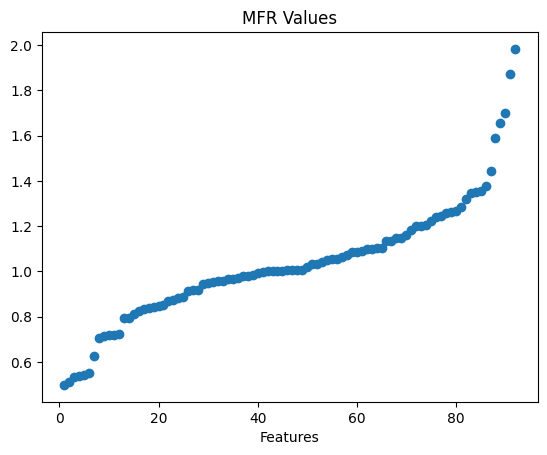

In [57]:
# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Plot nRoA values of each feature from smallest to largest
plt.pyplot.scatter(x= sorteddf.iloc[1:135,0],y = sorteddf.iloc[1:135,1])
plt.pyplot.title("MFR Values")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()

In [58]:
# Sort data frame by SDFR values and export
sorteddf=df.sort_values(by = 2)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_SDFR_vals.xlsx")

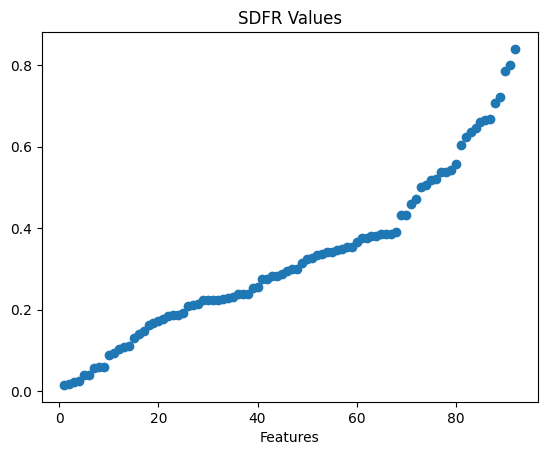

In [59]:
# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Plot nRoA values of each feature from smallest to largest
plt.pyplot.scatter(x= sorteddf.iloc[1:135,0],y = sorteddf.iloc[1:135,2])
plt.pyplot.title("SDFR Values")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()